In [ ]:
import gcp.storage as storage
import gcp.bigquery as bq

Let's go back to some abnormalities we've found earlier, like how there are some timeslots with vastly different number of orders than the rest. Is that pattern prevalent on number of gaps as well? To find this out, we will see how many gaps are there across different timeslots.

In [4]:
%%sql --module gaps_by_timeofday_slot
SELECT timeofday_slot, SUM(gap) AS total_gaps FROM [datalab-projects-1331:xjk_algo_comp.gaps]
GROUP BY timeofday_slot

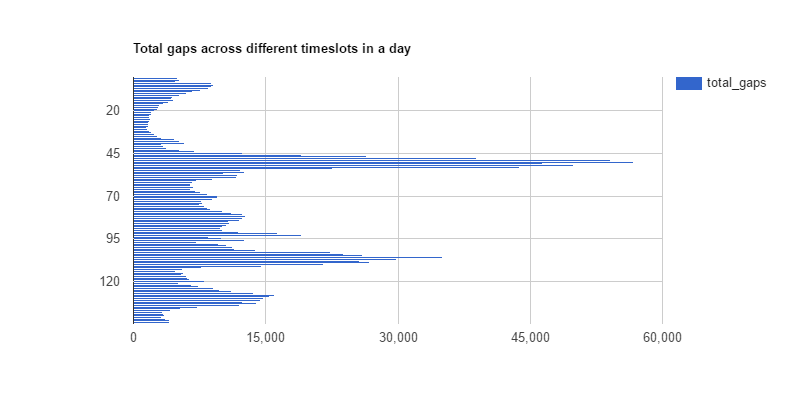

In [5]:
%%chart bars --data gaps_by_timeofday_slot
title: Total gaps across different timeslots in a day
height: 400
vAxis:
  direction: -1

Alright, seems like some timeslots do correlate with higher or lower gaps. This means we do need to include `timeofday_slot` (INTEGER, 1 to 144) as one of our features. Or rather, 144 of our features since we will use one hot encoding on it (explained later).

At this point, I wanted to see how all other variables are 

In [5]:
%%sql --module orders_by_timeofday_slot
SELECT FIRST(timeofday_slot), COUNT(*) AS num_orders FROM [datalab-projects-1331:xjk_algo_comp.orders]
GROUP BY timeofday_slot
ORDER BY timeofday_slot

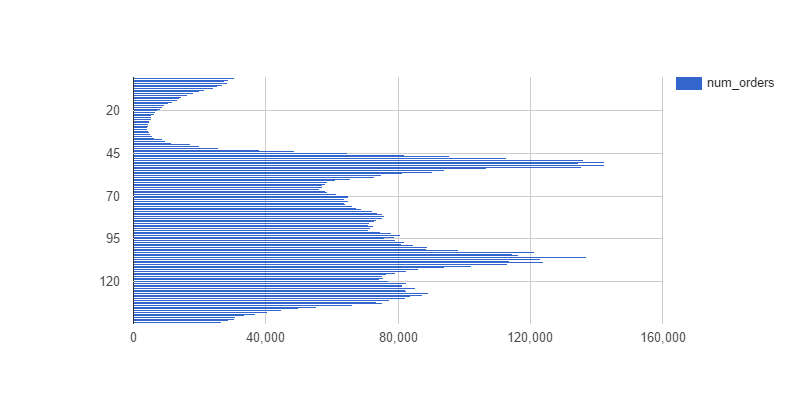

In [6]:
%%chart bars --data orders_by_timeofday_slot
height: 400
vAxis:
  direction: -1